In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
Y_train = Y_train.reshape(-1,)

In [ ]:
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
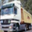

In [ ]:
X_train[1]

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
classes[0]

'airplane'

In [ ]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[Y[index]])


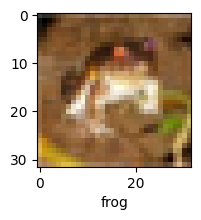

In [ ]:
plot_sample(X_train, Y_train, 0)

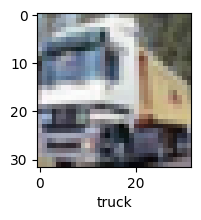

In [ ]:
plot_sample(X_train, Y_train, 1)

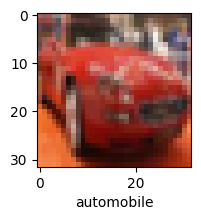

In [ ]:
plot_sample(X_train, Y_train, 5)

In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
X_train, X_test = X_train/255, X_test/255

In [ ]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4399 - accuracy: 0.4830
Epoch 2/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.0843 - accuracy: 0.6210
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9521 - accuracy: 0.6707
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8661 - accuracy: 0.7026
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7954 - accuracy: 0.7227
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7394 - accuracy: 0.7456
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6868 - accuracy: 0.7619
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6430 - accuracy: 0.7754
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6018 - accuracy: 0.7915
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [ ]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9014 - accuracy: 0.7065


[0.9014240503311157, 0.7064999938011169]

In [ ]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
Y_test = Y_test.reshape(-1,)

In [ ]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

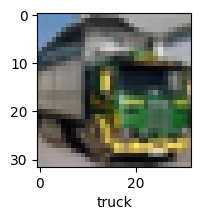

In [ ]:
plot_sample(X_test, Y_test, 14)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[8.7114850e-06, 3.0606157e-06, 2.2351204e-03, 9.6505237e-01,
        2.6875865e-04, 3.1396210e-02, 8.0541719e-04, 7.0646893e-05,
        1.5735030e-04, 2.2854149e-06],
       [2.0655639e-02, 3.4921272e-03, 1.0652403e-05, 2.7508839e-05,
        1.0993015e-06, 1.8418464e-07, 2.6097227e-09, 6.4135293e-06,
        9.7552890e-01, 2.7742406e-04],
       [3.9269257e-02, 2.8998101e-01, 2.1718760e-04, 4.3549761e-03,
        8.4900222e-04, 4.6884475e-04, 4.8237696e-05, 2.0223625e-03,
        6.0834587e-01, 5.4443303e-02],
       [9.9521428e-01, 1.0709035e-03, 1.2078667e-04, 8.1023888e-04,
        1.0987557e-03, 2.0651198e-07, 6.0212788e-05, 4.9295244e-07,
        1.4736168e-03, 1.5048338e-04],
       [3.8066528e-08, 1.7492753e-04, 4.4916596e-02, 1.8395840e-01,
        5.4999894e-01, 4.1712346e-03, 2.1674356e-01, 1.2865509e-06,
        3.2314209e-05, 2.6819291e-06]], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

3

In [ ]:
y_class = [np.argmax(element) for element in y_pred]

In [ ]:
y_class[:5]

[3, 8, 8, 0, 4]

In [ ]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)